In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from data_processing.cgm_data import CGMData, DATA_PATH
from data_processing.derived_datasets import max_glucose_dataset,max_glucose_between_meals_dataset


In [2]:
data = CGMData()

Things we need for regression of "peak glucose during interval between meals" and "glucose reading at time of meal, protein, carbs, fat

# Peak glucose between meals:
For this we will need a function that: 
1. Determines the length of time between meals - done
2. Grabs the glucose readings during this time - done
3. Returns the max reading, start value, and end value - done

# Glucose reading at time of meal:
This the end value from the previous function - done

# Protein, carbs, fat -> glycemic index:
This will come from the meal that's at the end time



In [3]:
# Max glucose between meals:
max_glucose_dataset(cgm_data=data,participant_num=1).head()

,calorie,total_carb,dietary_fiber,sugar,protein,total_fat,recent_meals,participant,max_glucose,high_glucose
0,456.0,85.0,1.7,83.0,16.0,3.3,1.0,1,143,False
1,488.0,2.5,1.2,0.8,63.4,23.1,1.0,1,106,False
2,230.0,35.0,NaN,18.0,13.0,NaN,1.0,1,122,False
3,280.0,30.0,NaN,22.0,4.0,NaN,1.0,1,110,False
4,358.0,14.4,NaN,8.7,13.9,NaN,1.0,1,124,False


In [4]:
max_glucose_between_meals_dataset(cgm_data=data,participant_num=1).head()

,calorie,total_carb,dietary_fiber,sugar,protein,total_fat,recent_meals,participant,max_glu_post_meal,glu_at_first_meal,glu_at_next_meal,high_glucose
0,456.0,85.0,1.7,83.0,16.0,3.3,1.0,1,143,59,108,False
1,488.0,2.5,1.2,0.8,63.4,23.1,1.0,1,114,104,93,False
2,230.0,35.0,NaN,18.0,13.0,NaN,1.0,1,122,92,90,False
3,280.0,30.0,NaN,22.0,4.0,NaN,1.0,1,110,89,101,False
4,358.0,14.4,NaN,8.7,13.9,NaN,1.0,1,146,105,86,False


Now we will implement linear regression

X will be peak glucose during interval between meals

y will be glucose reading at time of meal, protein, carbs, fat

In [5]:

X = max_glucose_between_meals_dataset(cgm_data=data,participant_num=1)["max_glu_post_meal"]

In [12]:
y1 = max_glucose_between_meals_dataset(cgm_data=data,participant_num=1)["glu_at_first_meal"]
y2 = max_glucose_between_meals_dataset(cgm_data=data,participant_num=1)["calorie"]
y3 = max_glucose_between_meals_dataset(cgm_data=data,participant_num=1)["total_carb"]
y4 = max_glucose_between_meals_dataset(cgm_data=data,participant_num=1)["dietary_fiber"]
y5 = max_glucose_between_meals_dataset(cgm_data=data,participant_num=1)["sugar"]
y6 = max_glucose_between_meals_dataset(cgm_data=data,participant_num=1)["protein"]
y7 = max_glucose_between_meals_dataset(cgm_data=data,participant_num=1)["total_fat"]

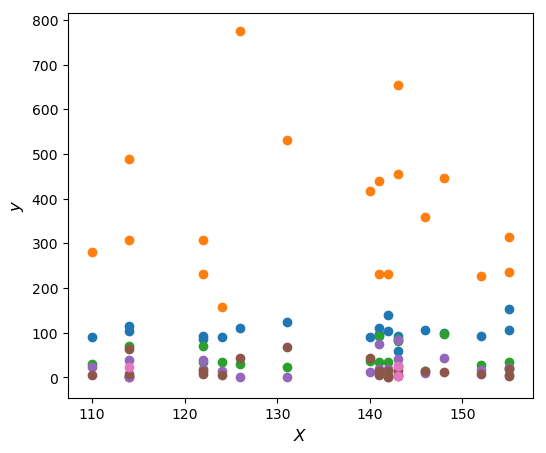

In [14]:
plt.figure(figsize=(6,5))

plt.scatter(X, y1)
plt.scatter(X, y2)
plt.scatter(X, y3)
plt.scatter(X, y4)
plt.scatter(X, y5)
plt.scatter(X, y6)
plt.scatter(X, y7)

plt.xlabel("$X$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

plt.show()

next turn this into a function of all these variables or explore using pairplot